[dataset link](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE7390)
pheno data pasted below for reference gotten from the above link

Install this file - GSE7390_transbig2006affy_demo.txt.gz

In [108]:
# install libraries
!pip install lifelines
!pip install seaborn
!pip install GEOparse
!pip install gprofiler-official

In [109]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter, statistics
from lifelines.statistics import logrank_test
from lifelines.plotting import add_at_risk_counts
import GEOparse
from lifelines.utils import to_long_format
from gprofiler import GProfiler

In [6]:
gse = GEOparse.get_GEO("GSE7390", destdir="./")

# Extract phenotype data which contains survival information
pheno_data = gse.phenotype_data

03-Jul-2024 19:16:06 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
03-Jul-2024 19:16:06 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE7nnn/GSE7390/soft/GSE7390_family.soft.gz to ./GSE7390_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE7nnn/GSE7390/soft/GSE7390_family.soft.gz to ./GSE7390_family.soft.gz
100%|██████████| 42.7M/42.7M [00:00<00:00, 123MB/s]
03-Jul-2024 19:16:06 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
03-Jul-2024 19:16:06 DEBUG downloader - Moving /tmp/tmpi7fbi5kz to /content/GSE7390_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmpi7fbi5kz to /content/GSE7390_family.soft.gz
03-Jul-2024 19:16:06 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE7nnn/GSE7390/soft/GSE7390_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE7nnn/GSE7390/soft/GSE7390

In [9]:
pheno_data.head(2)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,contact_institute,contact_address,contact_city,contact_state,contact_zip/postal_code,contact_country,supplementary_file,relation,series_id,data_row_count
GSM177885,VDXGUYU_4002,GSM177885,Public on Jun 11 2007,Mar 28 2007,May 31 2013,RNA,1,VDXGUYU_4002,Homo sapiens,9606,...,Princess Margaret Cancer Centre,610 University Avenue,Toronto,Ontario,M5G 2M9,Canada,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM177n...,"Reanalyzed by: GSE31519,Reanalyzed by: GSE47561",GSE7390,22283
GSM177886,VDXGUYU_4008,GSM177886,Public on Jun 11 2007,Mar 28 2007,May 31 2013,RNA,1,VDXGUYU_4008,Homo sapiens,9606,...,Princess Margaret Cancer Centre,610 University Avenue,Toronto,Ontario,M5G 2M9,Canada,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM177n...,Reanalyzed by: GSE47561,GSE7390,22283


In [105]:
print(pheno_data.columns)

Index(['title', 'geo_accession', 'status', 'submission_date',
       'last_update_date', 'type', 'channel_count', 'source_name_ch1',
       'organism_ch1', 'taxid_ch1', 'characteristics_ch1.0.samplename',
       'characteristics_ch1.1.id', 'characteristics_ch1.2.filename',
       'characteristics_ch1.3.hospital', 'characteristics_ch1.4.age',
       'characteristics_ch1.5.size', 'characteristics_ch1.6.Surgery_type',
       'characteristics_ch1.7.Histtype', 'characteristics_ch1.8.Angioinv',
       'characteristics_ch1.9.Lymp_infil', 'characteristics_ch1.10.node',
       'characteristics_ch1.11.grade', 'characteristics_ch1.12.er',
       'characteristics_ch1.13.t.rfs', 'characteristics_ch1.14.e.rfs',
       'characteristics_ch1.15.t.os', 'characteristics_ch1.16.e.os',
       'characteristics_ch1.17.t.dmfs', 'characteristics_ch1.18.e.dmfs',
       'characteristics_ch1.19.t.tdm', 'characteristics_ch1.20.e.tdm',
       'characteristics_ch1.21.risksg', 'characteristics_ch1.22.NPI',
       'ch

In [10]:
pheno_data[[
    "characteristics_ch1.4.age",
    "characteristics_ch1.5.size",
    "characteristics_ch1.6.Surgery_type",
    "characteristics_ch1.7.Histtype",
    "characteristics_ch1.8.Angioinv",
    "characteristics_ch1.9.Lymp_infil",
    "characteristics_ch1.10.node",
    "characteristics_ch1.11.grade",
    "characteristics_ch1.12.er",
    "characteristics_ch1.15.t.os",
    "characteristics_ch1.16.e.os"
]].head()

,characteristics_ch1.4.age,characteristics_ch1.5.size,characteristics_ch1.6.Surgery_type,characteristics_ch1.7.Histtype,characteristics_ch1.8.Angioinv,characteristics_ch1.9.Lymp_infil,characteristics_ch1.10.node,characteristics_ch1.11.grade,characteristics_ch1.12.er,characteristics_ch1.15.t.os,characteristics_ch1.16.e.os
GSM177885,57,3,0,1,1,2,0,3,0,937,1
GSM177886,57,3,0,2,1,3,0,3,1,6591,0
GSM177887,48,2.5,1,1,0,2,0,3,0,922,1
GSM177888,42,1.8,0,1,1,3,0,3,1,6255,1
GSM177889,46,3,0,1,1,2,0,2,1,4133,1


In [18]:
# Extract relevant columns for survival analysis
# Select relevant columns
pheno_data_subset = pheno_data[[
    "characteristics_ch1.4.age",
    "characteristics_ch1.5.size",
    "characteristics_ch1.6.Surgery_type",
    "characteristics_ch1.7.Histtype",
    "characteristics_ch1.8.Angioinv",
    "characteristics_ch1.9.Lymp_infil",
    "characteristics_ch1.10.node",
    "characteristics_ch1.11.grade",
    "characteristics_ch1.12.er",
    "characteristics_ch1.15.t.os",
    "characteristics_ch1.16.e.os"
]]

# Rename columns for clarity
pheno_data_subset.columns = [
    "age", "tumor_size", "surgery_type", "histological_type", "angio_invasion",
    "lymphatic_infiltration", "node_status", "grade", "ER_status", "time_os", "status_os"
]

In [19]:
pheno_data_subset.head(2)

,age,tumor_size,surgery_type,histological_type,angio_invasion,lymphatic_infiltration,node_status,grade,ER_status,time_os,status_os
GSM177885,57,3,0,1,1,2,0,3,0,937,1
GSM177886,57,3,0,2,1,3,0,3,1,6591,0


In [20]:
pheno_data_subset.age.value_counts()

age
43    15
47    14
42    11
46    11
50    11
44    10
48     9
38     9
45     9
54     9
39     8
51     8
49     8
56     8
40     6
53     6
57     6
58     6
37     5
59     4
52     3
55     3
33     3
60     3
41     2
35     2
24     2
36     2
32     2
34     1
30     1
31     1
Name: count, dtype: int64

In [21]:
# Drop rows with missing values
pheno_data_subset = pheno_data_subset.dropna()

# Display summary statistics
print(pheno_data_subset.describe())

        age tumor_size surgery_type histological_type angio_invasion  \
count   198        198          198               198            198   
unique   32         32            2                10              5   
top      43          2            0                 1             NA   
freq     15         34          142               158             77   

       lymphatic_infiltration node_status grade ER_status time_os status_os  
count                     198         198   198       198     198       198  
unique                      4           1     4         2     194         2  
top                        NA           0     3         1    5678         0  
freq                      117         198    83       134       2       142  


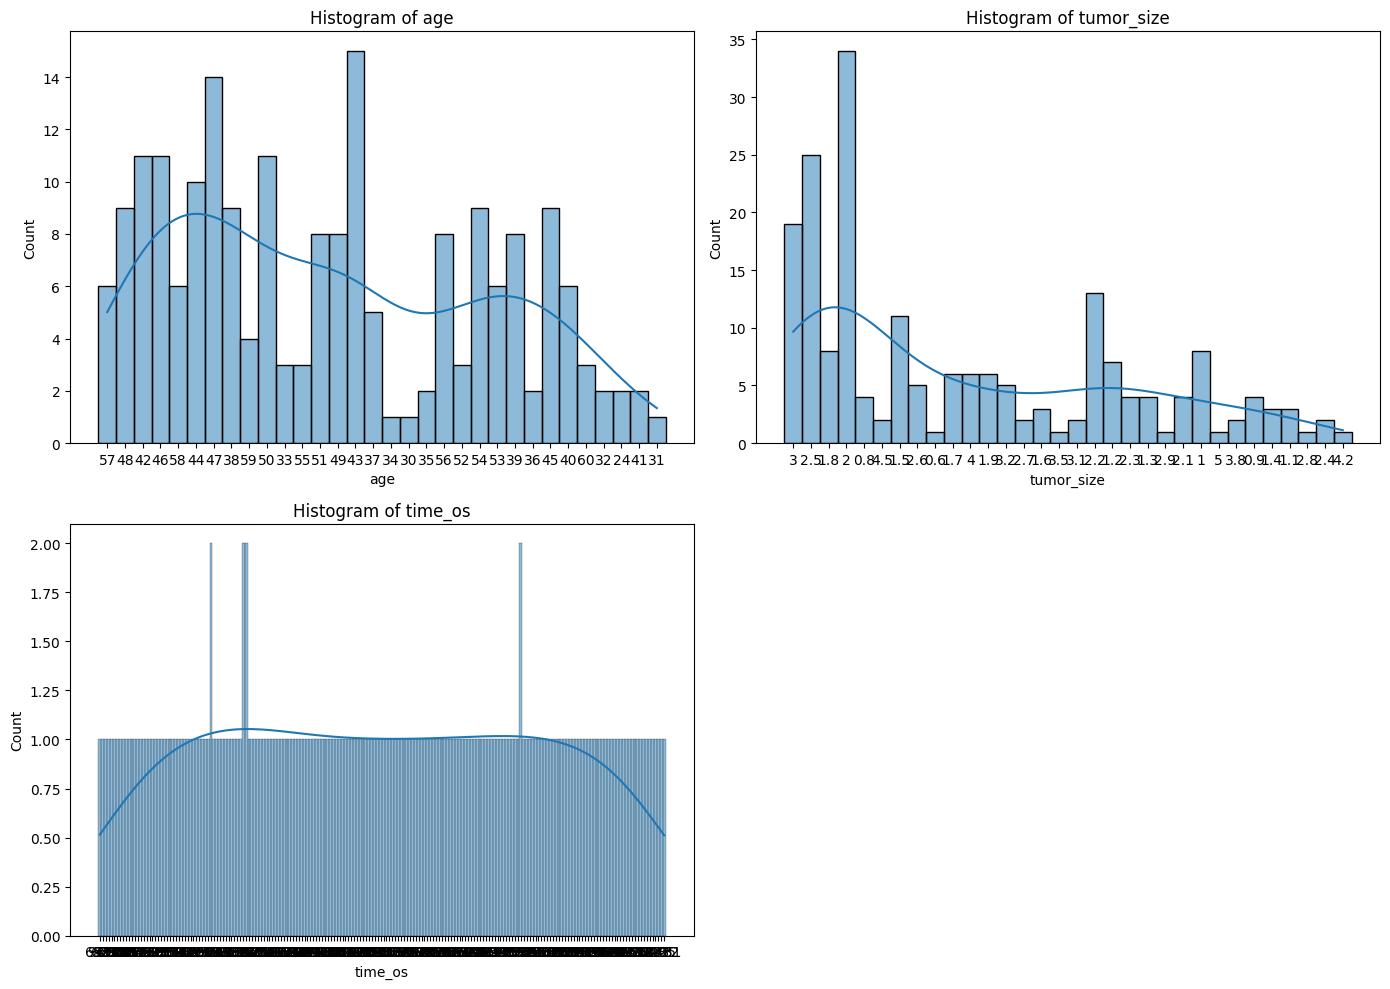

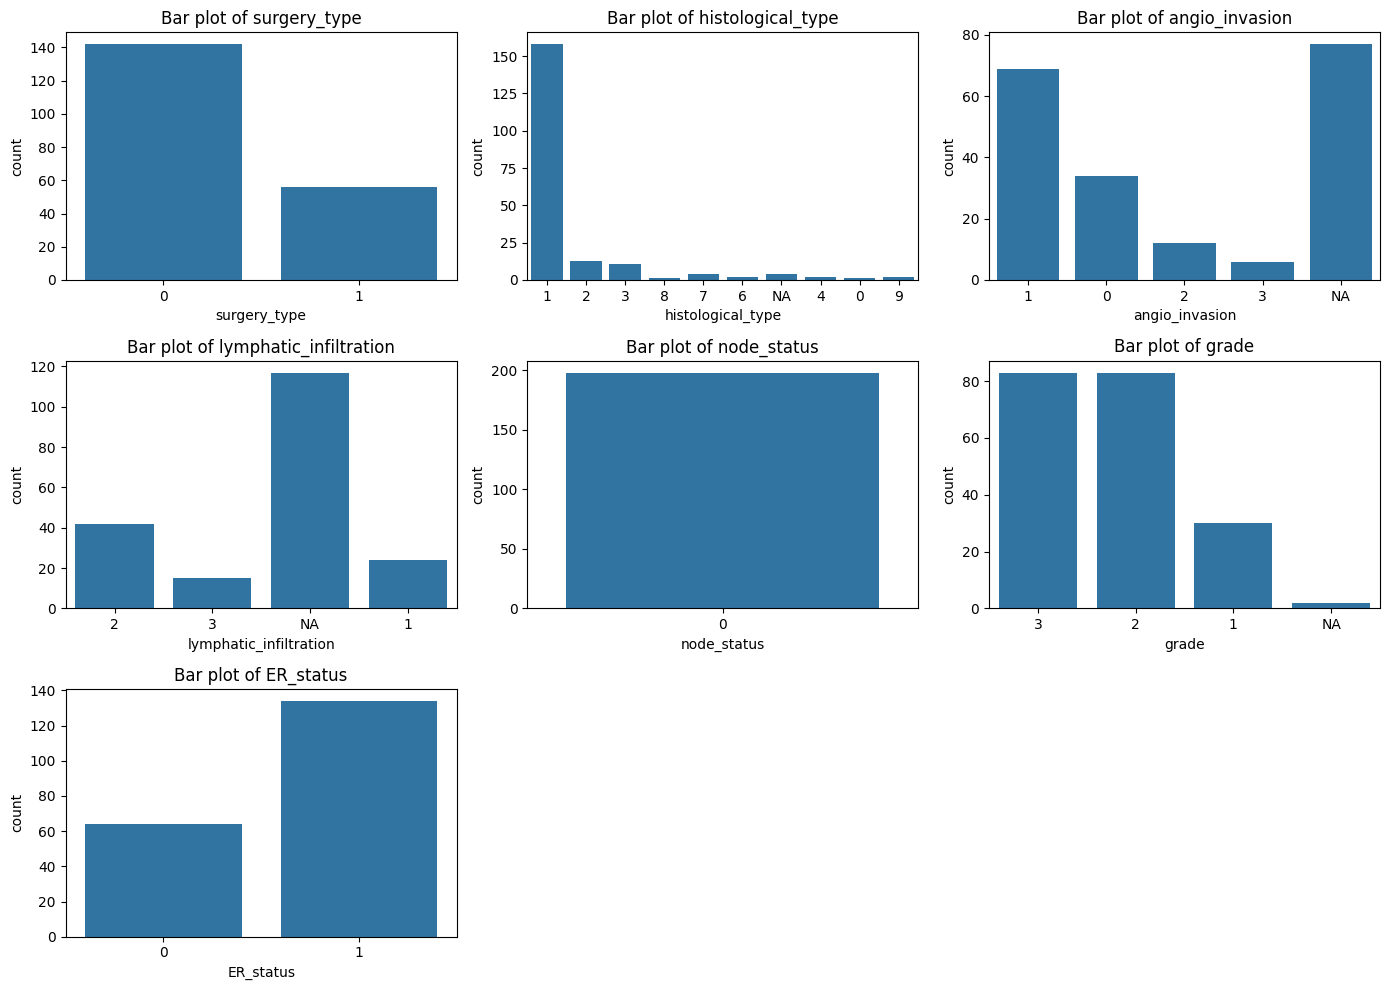

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

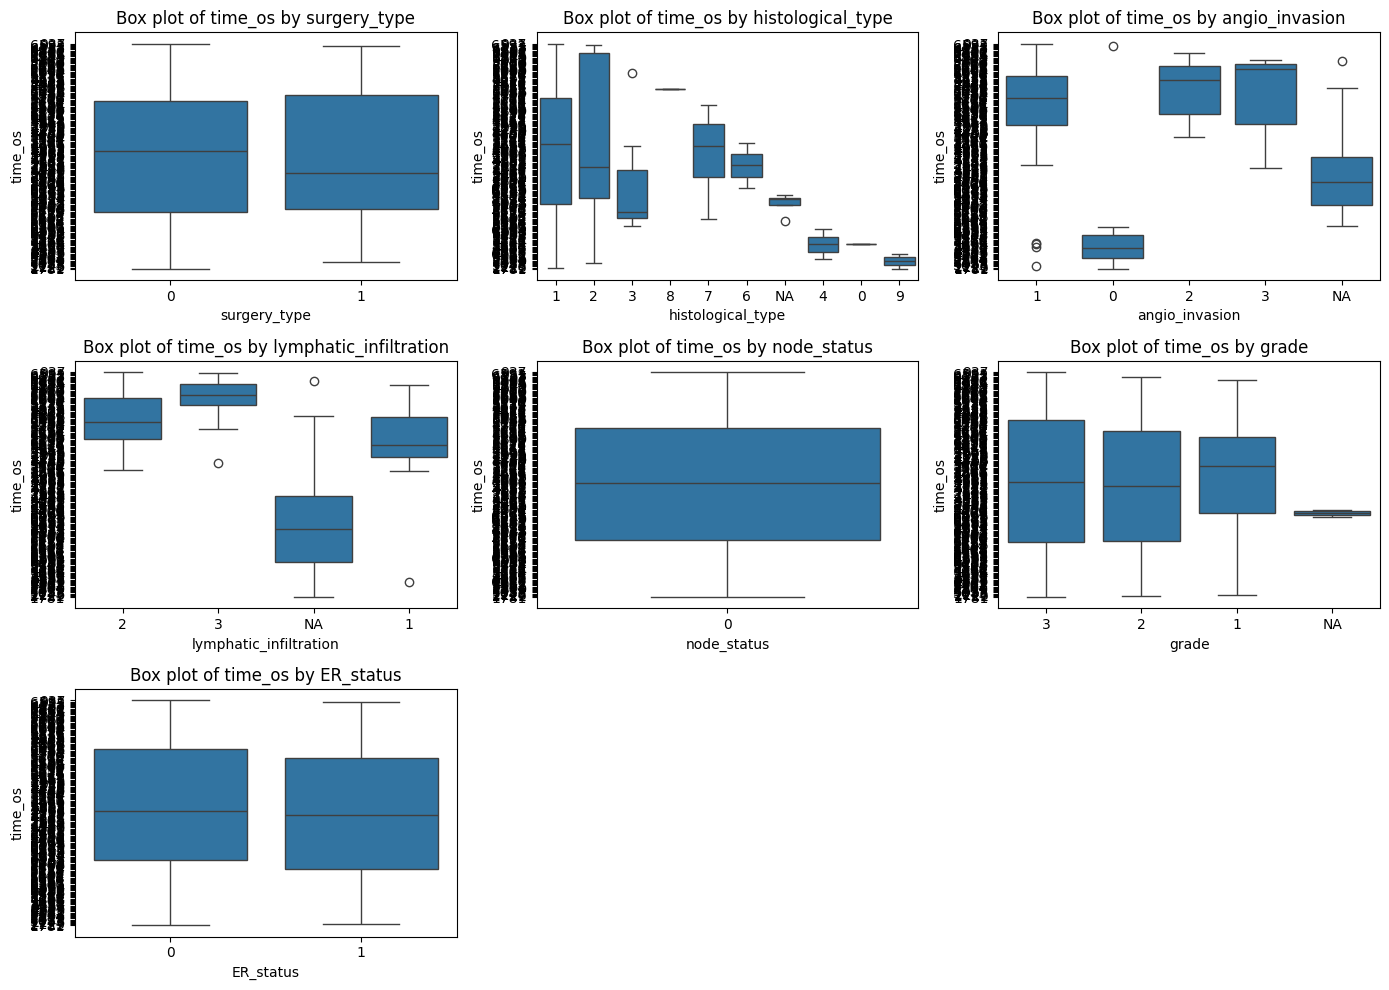

In [22]:
# Plot histograms for numerical variables
plt.figure(figsize=(14, 10))
for i, column in enumerate(['age', 'tumor_size', 'time_os']):
    plt.subplot(2, 2, i+1)
    sns.histplot(pheno_data_subset[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

# Plot bar plots for categorical variables
plt.figure(figsize=(14, 10))
for i, column in enumerate(['surgery_type', 'histological_type', 'angio_invasion', 'lymphatic_infiltration', 'node_status', 'grade', 'ER_status']):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=pheno_data_subset[column])
    plt.title(f'Bar plot of {column}')
plt.tight_layout()
plt.show()

# Plot box plots to show the distribution of numerical variables across different categories
plt.figure(figsize=(14, 10))
for i, column in enumerate(['surgery_type', 'histological_type', 'angio_invasion', 'lymphatic_infiltration', 'node_status', 'grade', 'ER_status']):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=pheno_data_subset[column], y=pheno_data_subset['time_os'])
    plt.title(f'Box plot of time_os by {column}')
plt.tight_layout()
plt.show()

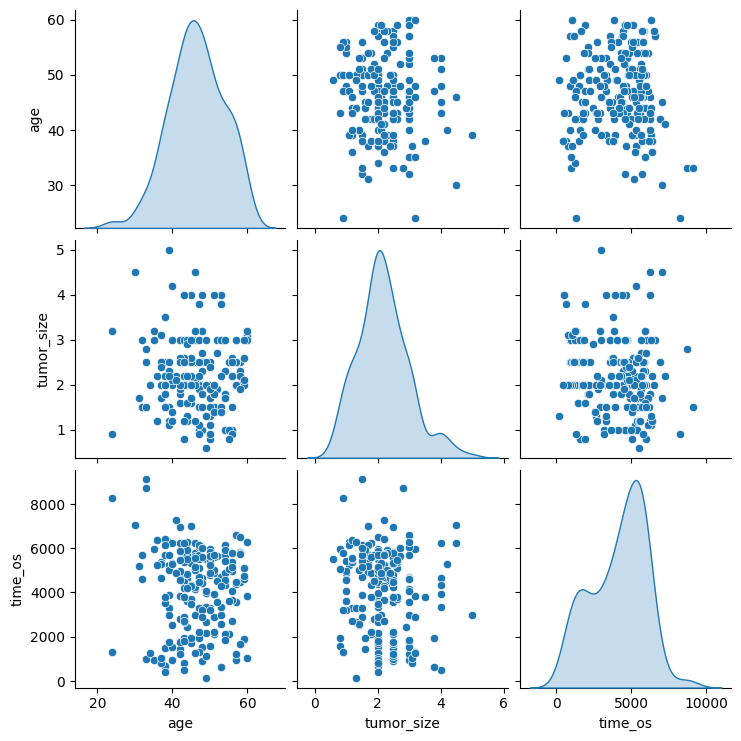

In [113]:
# Convert columns to numeric, handling errors
pheno_data_subset['age'] = pd.to_numeric(pheno_data_subset['age'], errors='coerce')
pheno_data_subset['tumor_size'] = pd.to_numeric(pheno_data_subset['tumor_size'], errors='coerce')
pheno_data_subset['time_os'] = pd.to_numeric(pheno_data_subset['time_os'], errors='coerce')

# Drop rows with missing values after conversion
pheno_data_subset = pheno_data_subset.dropna(subset=['age', 'tumor_size', 'time_os'])

# Plot pair plots
sns.pairplot(pheno_data_subset[['age', 'tumor_size', 'time_os']], diag_kind='kde')
plt.show()

In [23]:
pheno_data_subset.head(2)

,age,tumor_size,surgery_type,histological_type,angio_invasion,lymphatic_infiltration,node_status,grade,ER_status,time_os,status_os
GSM177885,57,3,0,1,1,2,0,3,0,937,1
GSM177886,57,3,0,2,1,3,0,3,1,6591,0


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


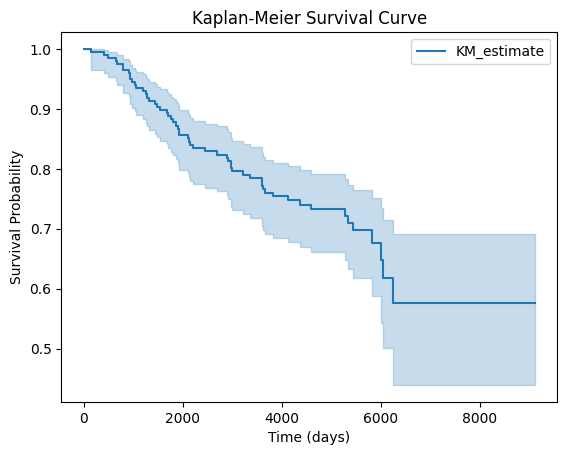

In [24]:
# Kaplan-Meier Estimator
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier estimator on the dataset
kmf.fit(durations=pheno_data_subset['time_os'], event_observed=pheno_data_subset['status_os'])

# Plot the survival function
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.show()

In [28]:
# Kaplan-Meier Estimator by ER Status
# Fit the Kaplan-Meier estimator for ER-positive and ER-negative groups
pheno_data_subset['ER_status'] = pheno_data_subset['ER_status'].astype(int)
groups = pheno_data_subset['ER_status']
ix_positive = (groups == 1)
ix_negative = (groups == 0)

# Ensure both 'time_os' and 'status_os' are numeric
# (This is likely where the issue lies based on the traceback)
pheno_data_subset['time_os'] = pd.to_numeric(pheno_data_subset['time_os'], errors='coerce')
pheno_data_subset['status_os'] = pd.to_numeric(pheno_data_subset['status_os'], errors='coerce')

# Drop any rows with missing values after the conversion
pheno_data_subset = pheno_data_subset.dropna(subset=['time_os', 'status_os'])

# Initialize KaplanMeierFitter instances
kmf_positive = KaplanMeierFitter()  # Initialize kmf_positive
kmf_negative = KaplanMeierFitter()  # Initialize kmf_negative

kmf_positive.fit(durations=pheno_data_subset['time_os'][ix_positive], event_observed=pheno_data_subset['status_os'][ix_positive], label='ER Positive')
kmf_negative.fit(durations=pheno_data_subset['time_os'][ix_negative], event_observed=pheno_data_subset['status_os'][ix_negative], label='ER Negative')


<lifelines.KaplanMeierFitter:"ER Negative", fitted with 64 total observations, 39 right-censored observations>

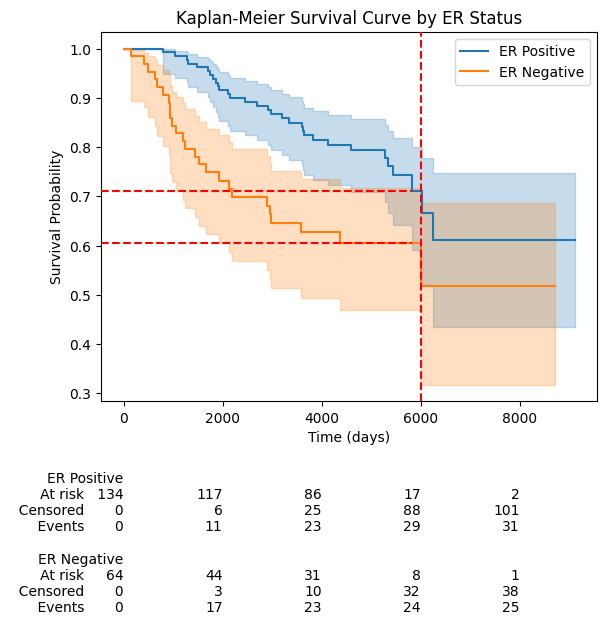

In [33]:
# Plot the survival function for both groups
ax = kmf_positive.plot_survival_function()
kmf_negative.plot_survival_function(ax=ax)

# Add title and labels
plt.title('Kaplan-Meier Survival Curve by ER Status')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')

# Add p-value from log-rank test
# ... (this part remains the same)

# Add risk table
add_at_risk_counts(kmf_positive, kmf_negative, ax=ax)

# Add vertical line at x = 6000 (red and dashed)
plt.axvline(x=6000, color='red', linestyle='--')

# Find y-value where the vertical line intersects the survival curves
# Use .item() to extract the single float value from the Series
y_positive = kmf_positive.survival_function_at_times(6000).item()
y_negative = kmf_negative.survival_function_at_times(6000).item()

# Add horizontal lines to mark the intersections
plt.axhline(y=y_positive, color='red', linestyle='--', xmin=0, xmax=6000/plt.xlim()[1])
plt.axhline(y=y_negative, color='red', linestyle='--', xmin=0, xmax=6000/plt.xlim()[1])

# Show the plot
plt.show()

In [34]:
# Download the dataset
gse = GEOparse.get_GEO("GSE7390")

# Extract the expression data
expression_data = gse.pivot_samples('VALUE')

# Extract the phenotype data
phenotype_data = gse.phenotype_data

# preprocessed pheno data from before -> pheno_data_subset

03-Jul-2024 19:42:56 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
03-Jul-2024 19:42:56 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
03-Jul-2024 19:42:56 INFO GEOparse - Parsing ./GSE7390_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE7390_family.soft.gz: 
03-Jul-2024 19:42:56 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
03-Jul-2024 19:42:56 DEBUG GEOparse - SERIES: GSE7390
DEBUG:GEOparse:SERIES: GSE7390
03-Jul-2024 19:42:56 DEBUG GEOparse - PLATFORM: GPL96
DEBUG:GEOparse:PLATFORM: GPL96
03-Jul-2024 19:42:58 DEBUG GEOparse - SAMPLE: GSM177885
DEBUG:GEOparse:SAMPLE: GSM177885
03-Jul-2024 19:42:58 DEBUG GEOparse - SAMPLE: GSM177886
DEBUG:GEOparse:SAMPLE: GSM177886
03-Jul-2024 19:42:58 DEBUG GEOparse - SAMPLE: GSM177887
DEBUG:GEOparse:SAMPLE: GSM177887
03-Jul-2024 19:42:58 DEBUG GEOparse - SAMPLE: GSM177888
DEBUG:GEOparse:SAMPLE: GSM177888
0

In [37]:
expression_data.shape

(22283, 198)

In [38]:
# Example preprocessing: removing rows/columns with many missing values, normalizing the data, etc.
expression_data = expression_data.dropna()
expression_data.shape

(22283, 198)

In [53]:
# Reset index to convert row names to a column
pheno_data_subset.reset_index(inplace=True)

# Rename the new column (if desired)
pheno_data_subset.rename(columns={'index': 'sample_id'}, inplace=True)

pheno_data_subset.head(3)


,sample_id,age,tumor_size,surgery_type,histological_type,angio_invasion,lymphatic_infiltration,node_status,grade,ER_status,time_os,status_os
0,GSM177885,57,3,0,1,1,2,0,3,0,937,1
1,GSM177886,57,3,0,2,1,3,0,3,1,6591,0
2,GSM177887,48,2.5,1,1,0,2,0,3,0,922,1


In [54]:
# Set sample_id as index for easy merging
pheno_data_subset.set_index('sample_id', inplace=True)

# Merge expression data with clinical data
combined_data = pheno_data_subset.merge(expression_data.T, left_index=True, right_index=True)
combined_data.head(2)

,age,tumor_size,surgery_type,histological_type,angio_invasion,lymphatic_infiltration,node_status,grade,ER_status,time_os,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-Hs18SrRNA-3_s_at,AFFX-r2-Hs18SrRNA-5_at,AFFX-r2-Hs18SrRNA-M_x_at,AFFX-r2-Hs28SrRNA-3_at,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM177885,57,3,0,1,1,2,0,3,0,937,...,13.398223,12.868821,10.129303,10.466296,9.718451,12.138810,8.921485,9.313626,14.888195,14.369094
GSM177886,57,3,0,2,1,3,0,3,1,6591,...,13.088804,12.905456,9.248712,8.794884,8.979137,12.029347,8.696506,8.711194,15.011879,14.545059


In [59]:
# Initialize Cox Proportional Hazards model
cph = CoxPHFitter()

# Run survival analysis for each gene and extract statistics
results = []
for gene in expression_data.index:
    df = combined_data[['time_os', 'status_os', gene]].replace('NA', np.nan).dropna()
    if len(df) > 10:  # Ensure there is enough data to fit the model
        cph.fit(df, duration_col='time_os', event_col='status_os')
        summary = cph.summary
        p_value = summary.loc[gene, 'p']
        wald_test = summary.loc[gene, 'z']
        beta = summary.loc[gene, 'coef']
        HR = summary.loc[gene, 'exp(coef)']
        HR_confint_lower = summary.loc[gene, 'exp(coef) lower 95%']
        HR_confint_upper = summary.loc[gene, 'exp(coef) upper 95%']
        HR_str = f"{HR} ({HR_confint_lower} - {HR_confint_upper})"
        res = {
            'gene': gene,
            'beta': beta,
            'HR (95% CI for HR)': HR_str,
            'wald.test': wald_test,
            'p.value': p_value
        }
        results.append(res)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)


In [61]:
results_df.to_csv('gene_survival_analysis_results.csv', index=False)

In [63]:
results_df.head(5)

,gene,beta,HR (95% CI for HR),wald.test,p.value
0,1007_s_at,0.067281,1.0695960720774276 (0.6813600550179844 - 1.679...,0.292427,0.769960
1,1053_at,0.260545,1.2976368826369602 (0.8068693682602599 - 2.086...,1.074758,0.282483
2,117_at,-0.114970,0.8913931143254676 (0.6373195754468174 - 1.246...,-0.671615,0.501829
3,121_at,0.003034,1.003038580113324 (0.4567152323084923 - 2.2028...,0.007558,0.993969
4,1255_g_at,0.154009,1.1665014508020193 (0.9342261260102079 - 1.456...,1.359414,0.174015


In [69]:
# Top Genes by p-value
sig_genes_pvalue = results_df[results_df['p.value'] < 0.05].sort_values(by='p.value')
print(sig_genes_pvalue.shape, results_df.shape)

(1487, 5) (22283, 5)


In [70]:
sig_genes_pvalue

,gene,beta,HR (95% CI for HR),wald.test,p.value
287,200760_s_at,-1.098266,0.3334486467537637 (0.2073140474379388 - 0.536...,-4.529288,0.000006
12464,213082_s_at,-0.851301,0.4268591736577127 (0.2918755591662348 - 0.624...,-4.389378,0.000011
19331,219968_at,-0.828785,0.4365793191583337 (0.299043331370755 - 0.6373...,-4.292992,0.000018
18090,218727_at,1.181346,3.258757398748576 (1.8925275609433092 - 5.6112...,4.260685,0.000020
3011,203485_at,-0.433630,0.6481520178645003 (0.5305439637968242 - 0.791...,-4.244775,0.000022
...,...,...,...,...,...
11681,212296_at,0.576535,1.7798610234491707 (1.0003694676886834 - 3.166...,1.961221,0.049853
361,200834_s_at,-0.568236,0.5665236925016689 (0.3210294582796323 - 0.999...,-1.960828,0.049899
3632,204106_at,0.580542,1.7870074444242736 (1.0002173258993348 - 3.192...,1.960698,0.049914
11370,211984_at,0.543710,1.7223854602825444 (1.000059767431747 - 2.9664...,1.960179,0.049975


In [71]:
# Extract the platform information (assume GPL570)
gpl_id = 'GPL570'
gpl = GEOparse.get_GEO(gpl_id)

# Extract the table from the GPL data
gpl_table = gpl.table


03-Jul-2024 20:27:16 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
03-Jul-2024 20:27:16 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GPL570&form=text&view=full to ./GPL570.txt
INFO:GEOparse:Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GPL570&form=text&view=full to ./GPL570.txt
03-Jul-2024 20:27:19 DEBUG downloader - Total size: 0
DEBUG:GEOparse:Total size: 0
03-Jul-2024 20:27:19 DEBUG downloader - md5: None
DEBUG:GEOparse:md5: None
81.5MB [00:03, 27.9MB/s]
03-Jul-2024 20:27:22 DEBUG downloader - Moving /tmp/tmp6ucr2jft to /content/GPL570.txt
DEBUG:GEOparse:Moving /tmp/tmp6ucr2jft to /content/GPL570.txt
03-Jul-2024 20:27:23 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GPL570&form=text&view=full
DEBUG:GEOparse:Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GPL570&fo

In [73]:
# Merge the results DataFrame with the GPL table to get gene symbols
sig_genes_pvalue1 = sig_genes_pvalue.merge(gpl_table[['ID', 'Gene Symbol']], left_on='gene', right_on='ID', how='left')

# Drop the 'ID' column as it's redundant
sig_genes_pvalue1.drop(columns=['ID'], inplace=True)

# Rename columns for clarity
sig_genes_pvalue1.rename(columns={'Gene Symbol': 'Gene Symbol'}, inplace=True)

# Print the updated DataFrame
sig_genes_pvalue1.head()

,gene,beta,HR (95% CI for HR),wald.test,p.value,Gene Symbol
0,200760_s_at,-1.098266,0.3334486467537637 (0.2073140474379388 - 0.536...,-4.529288,0.000006,ARL6IP5
1,213082_s_at,-0.851301,0.4268591736577127 (0.2918755591662348 - 0.624...,-4.389378,0.000011,SLC35D2
2,219968_at,-0.828785,0.4365793191583337 (0.299043331370755 - 0.6373...,-4.292992,0.000018,ZNF589
3,218727_at,1.181346,3.258757398748576 (1.8925275609433092 - 5.6112...,4.260685,0.000020,SLC38A7
4,203485_at,-0.433630,0.6481520178645003 (0.5305439637968242 - 0.791...,-4.244775,0.000022,RTN1


In [84]:
sig_genes_pvalue2 = sig_genes_pvalue1.drop_duplicates(subset='Gene Symbol')

# Extract Hazard Ratio (HR) and its confidence intervals
sig_genes_pvalue2[['HR', 'CI Lower', 'CI Upper']] = sig_genes_pvalue2['HR (95% CI for HR)'].str.extract(r'([0-9\.]+) \(([0-9\.]+) - ([0-9\.]+)\)').astype(float)

# Filter for significant genes with p-value < 0.05 and HR > 1 (for increased risk) or HR < 1 (for decreased risk)
significant_genes_df_increase_risk = sig_genes_pvalue2[(sig_genes_pvalue2['p.value'] < 0.05) & (sig_genes_pvalue2['HR'] > 1)]
significant_genes_df_decrease_risk = sig_genes_pvalue2[(sig_genes_pvalue2['p.value'] < 0.05) & (sig_genes_pvalue2['HR'] < 1)]

sig_genes_pvalue2.to_csv('gene_survival_analysis_results_significant.csv', index=False)
significant_genes_df_increase_risk.to_csv('gene_survival_analysis_results_significant_increase_hazad.csv', index=False)
significant_genes_df_decrease_risk.to_csv('gene_survival_analysis_results_significant_decrease_hazad.csv', index=False)

print(significant_genes_df_increase_risk.shape, significant_genes_df_decrease_risk.shape)

(666, 9) (582, 9)


<ipython-input-84-56e31d4a1a7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_genes_pvalue2[['HR', 'CI Lower', 'CI Upper']] = sig_genes_pvalue2['HR (95% CI for HR)'].str.extract(r'([0-9\.]+) \(([0-9\.]+) - ([0-9\.]+)\)').astype(float)
<ipython-input-84-56e31d4a1a7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_genes_pvalue2[['HR', 'CI Lower', 'CI Upper']] = sig_genes_pvalue2['HR (95% CI for HR)'].str.extract(r'([0-9\.]+) \(([0-9\.]+) - ([0-9\.]+)\)').astype(float)
<ipython-input-84-56e31d4a1a

In [85]:
significant_genes_df_decrease_risk

,gene,beta,HR (95% CI for HR),wald.test,p.value,Gene Symbol,HR,CI Lower,CI Upper
0,200760_s_at,-1.098266,0.3334486467537637 (0.2073140474379388 - 0.536...,-4.529288,0.000006,ARL6IP5,0.333449,0.207314,0.536326
1,213082_s_at,-0.851301,0.4268591736577127 (0.2918755591662348 - 0.624...,-4.389378,0.000011,SLC35D2,0.426859,0.291876,0.624269
2,219968_at,-0.828785,0.4365793191583337 (0.299043331370755 - 0.6373...,-4.292992,0.000018,ZNF589,0.436579,0.299043,0.637371
4,203485_at,-0.433630,0.6481520178645003 (0.5305439637968242 - 0.791...,-4.244775,0.000022,RTN1,0.648152,0.530544,0.791831
6,209368_at,-0.316423,0.7287510352884539 (0.6266487277702132 - 0.847...,-4.108607,0.000040,EPHX2,0.728751,0.626649,0.847489
...,...,...,...,...,...,...,...,...,...
1469,213474_at,-0.313588,0.7308197348045019 (0.5347021528778808 - 0.998...,-1.967062,0.049176,KCTD7 /// RABGEF1,0.730820,0.534702,0.998869
1477,219393_s_at,-0.344007,0.708923911383444 (0.5029140177683981 - 0.9993...,-1.963835,0.049549,AKT3,0.708924,0.502914,0.999322
1478,207849_at,-0.150427,0.8603404704529438 (0.7403669628942564 - 0.999...,-1.963159,0.049628,IL2,0.860340,0.740367,0.999755
1481,219013_at,-0.447856,0.6389969117652546 (0.40847072164133486 - 0.99...,-1.961612,0.049808,GALNT11,0.638997,0.408471,0.999624


In [86]:
significant_genes_df_increase_risk

,gene,beta,HR (95% CI for HR),wald.test,p.value,Gene Symbol,HR,CI Lower,CI Upper
3,218727_at,1.181346,3.258757398748576 (1.8925275609433092 - 5.6112...,4.260685,0.000020,SLC38A7,3.258757,1.892528,5.611279
5,220106_at,0.346536,1.4141599808985064 (1.1991855575735415 - 1.667...,4.119018,0.000038,NPC1L1,1.414160,1.199186,1.667672
10,208968_s_at,1.019820,2.7726963803483704 (1.6177176670447313 - 4.752...,3.709718,0.000207,CIAPIN1,2.772696,1.617718,4.752279
11,218883_s_at,0.582168,1.7899147588807647 (1.312566935830696 - 2.4408...,3.678562,0.000235,CENPU,1.789915,1.312567,2.440862
12,203162_s_at,0.831369,2.2964600134712922 (1.470553732468272 - 3.5862...,3.655697,0.000256,KATNB1,2.296460,1.470554,3.586220
...,...,...,...,...,...,...,...,...,...
1480,210132_at,0.257781,1.2940554976078806 (1.0003020305688757 - 1.674...,1.962263,0.049732,EFNA3,1.294055,1.000302,1.674074
1482,212296_at,0.576535,1.7798610234491707 (1.0003694676886834 - 3.166...,1.961221,0.049853,PSMD14,1.779861,1.000369,3.166735
1484,204106_at,0.580542,1.7870074444242736 (1.0002173258993348 - 3.192...,1.960698,0.049914,TESK1,1.787007,1.000217,3.192702
1485,211984_at,0.543710,1.7223854602825444 (1.000059767431747 - 2.9664...,1.960179,0.049975,CALM1 /// CALM2 /// CALM3,1.722385,1.000060,2.966434


In [95]:
# Get the most significant gene by sorting by p-value
most_significant_gene_HR_1 = significant_genes_df_increase_risk.sort_values(by='p.value').head(10)
most_significant_gene_HR_0 = significant_genes_df_decrease_risk.sort_values(by='p.value').head(10)

In [162]:
(most_significant_gene_HR_1[['Gene Symbol', 'p.value', 'HR']].iloc[::-1])
(most_significant_gene_HR_0[['Gene Symbol', 'p.value', 'HR']].iloc[::-1])


,Gene Symbol,p.value,HR
18,C9orf156,0.000491,0.653663
17,SIK2,0.000487,0.696943
9,DFFB,0.000178,0.549663
8,MGMT,0.000102,0.529302
7,PAOX,0.000063,0.309853
6,EPHX2,0.000040,0.728751
4,RTN1,0.000022,0.648152
2,ZNF589,0.000018,0.436579
1,SLC35D2,0.000011,0.426859
0,ARL6IP5,0.000006,0.333449


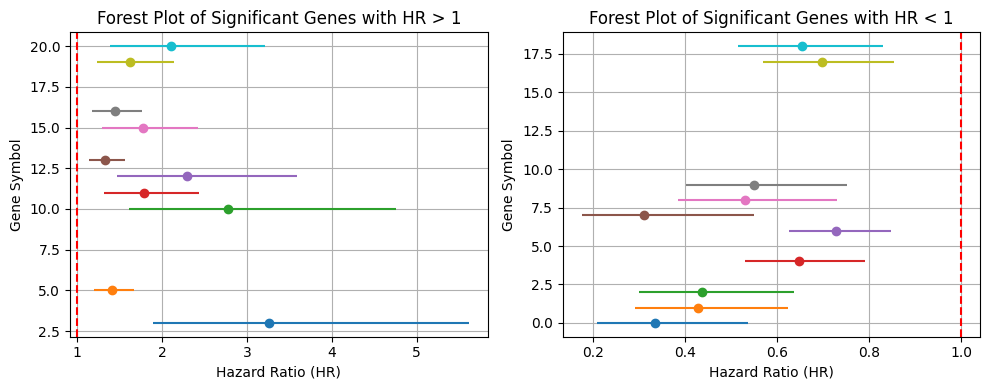

In [152]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Forest Plot for significant genes with HR > 1
axs[0].set_title('Forest Plot of Significant Genes with HR > 1')
for index, row in most_significant_gene_HR_1.iterrows():
    hr = row['HR']
    ci_lower = row['CI Lower']
    ci_upper = row['CI Upper']
    axs[0].errorbar(x=hr, y=index, xerr=[[hr - ci_lower], [ci_upper - hr]], fmt='o', label=row['Gene Symbol'])
axs[0].axvline(x=1, linestyle='--', color='red')
axs[0].set_xlabel('Hazard Ratio (HR)')
axs[0].set_ylabel('Gene Symbol')
axs[0].grid(True)

# Forest Plot for significant genes with HR < 1
axs[1].set_title('Forest Plot of Significant Genes with HR < 1')
for index, row in most_significant_gene_HR_0.iterrows():
    hr = row['HR']
    ci_lower = row['CI Lower']
    ci_upper = row['CI Upper']
    axs[1].errorbar(x=hr, y=index, xerr=[[hr - ci_lower], [ci_upper - hr]], fmt='o', label=row['Gene Symbol'])
axs[1].axvline(x=1, linestyle='--', color='red')
axs[1].set_xlabel('Hazard Ratio (HR)')
axs[1].set_ylabel('Gene Symbol')
axs[1].grid(True)

plt.tight_layout()
plt.show()

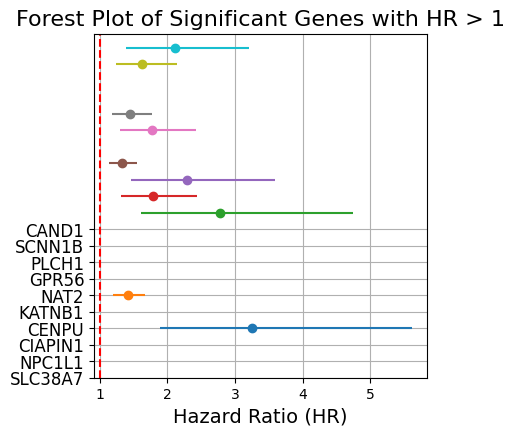

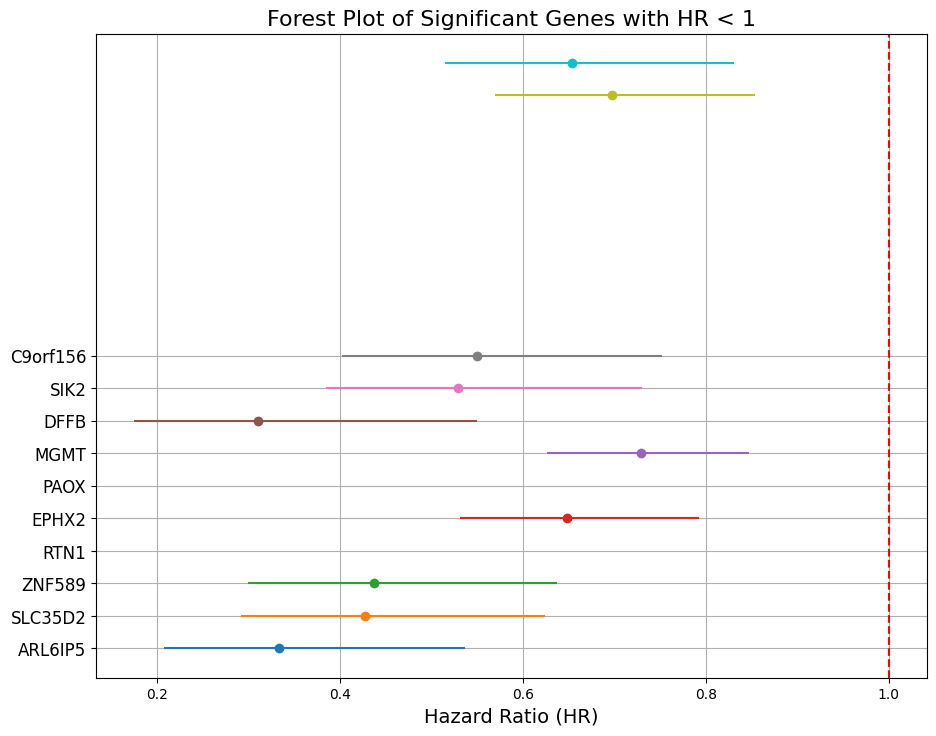

In [155]:
# Forest Plot for significant genes with HR > 1
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Forest Plot of Significant Genes with HR > 1', fontsize=16)
for index, row in most_significant_gene_HR_1.iterrows():
    hr = row['HR']
    ci_lower = row['CI Lower']
    ci_upper = row['CI Upper']
    ax.errorbar(x=hr, y=index, xerr=[[hr - ci_lower], [ci_upper - hr]], fmt='o')
ax.axvline(x=1, linestyle='--', color='red')
ax.set_xlabel('Hazard Ratio (HR)', fontsize=14)
ax.set_yticks(range(len(most_significant_gene_HR_1)))
ax.set_yticklabels(most_significant_gene_HR_1['Gene Symbol'], fontsize=12)
ax.grid(True)
plt.tight_layout(pad=3.0)
plt.show()

# Forest Plot for significant genes with HR < 1
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Forest Plot of Significant Genes with HR < 1', fontsize=16)
for index, row in most_significant_gene_HR_0.iterrows():
    hr = row['HR']
    ci_lower = row['CI Lower']
    ci_upper = row['CI Upper']
    ax.errorbar(x=hr, y=index, xerr=[[hr - ci_lower], [ci_upper - hr]], fmt='o')
ax.axvline(x=1, linestyle='--', color='red')
ax.set_xlabel('Hazard Ratio (HR)', fontsize=14)
ax.set_yticks(range(len(most_significant_gene_HR_0)))
ax.set_yticklabels(most_significant_gene_HR_0['Gene Symbol'], fontsize=12)
ax.grid(True)
plt.tight_layout(pad=3.0)
plt.show()

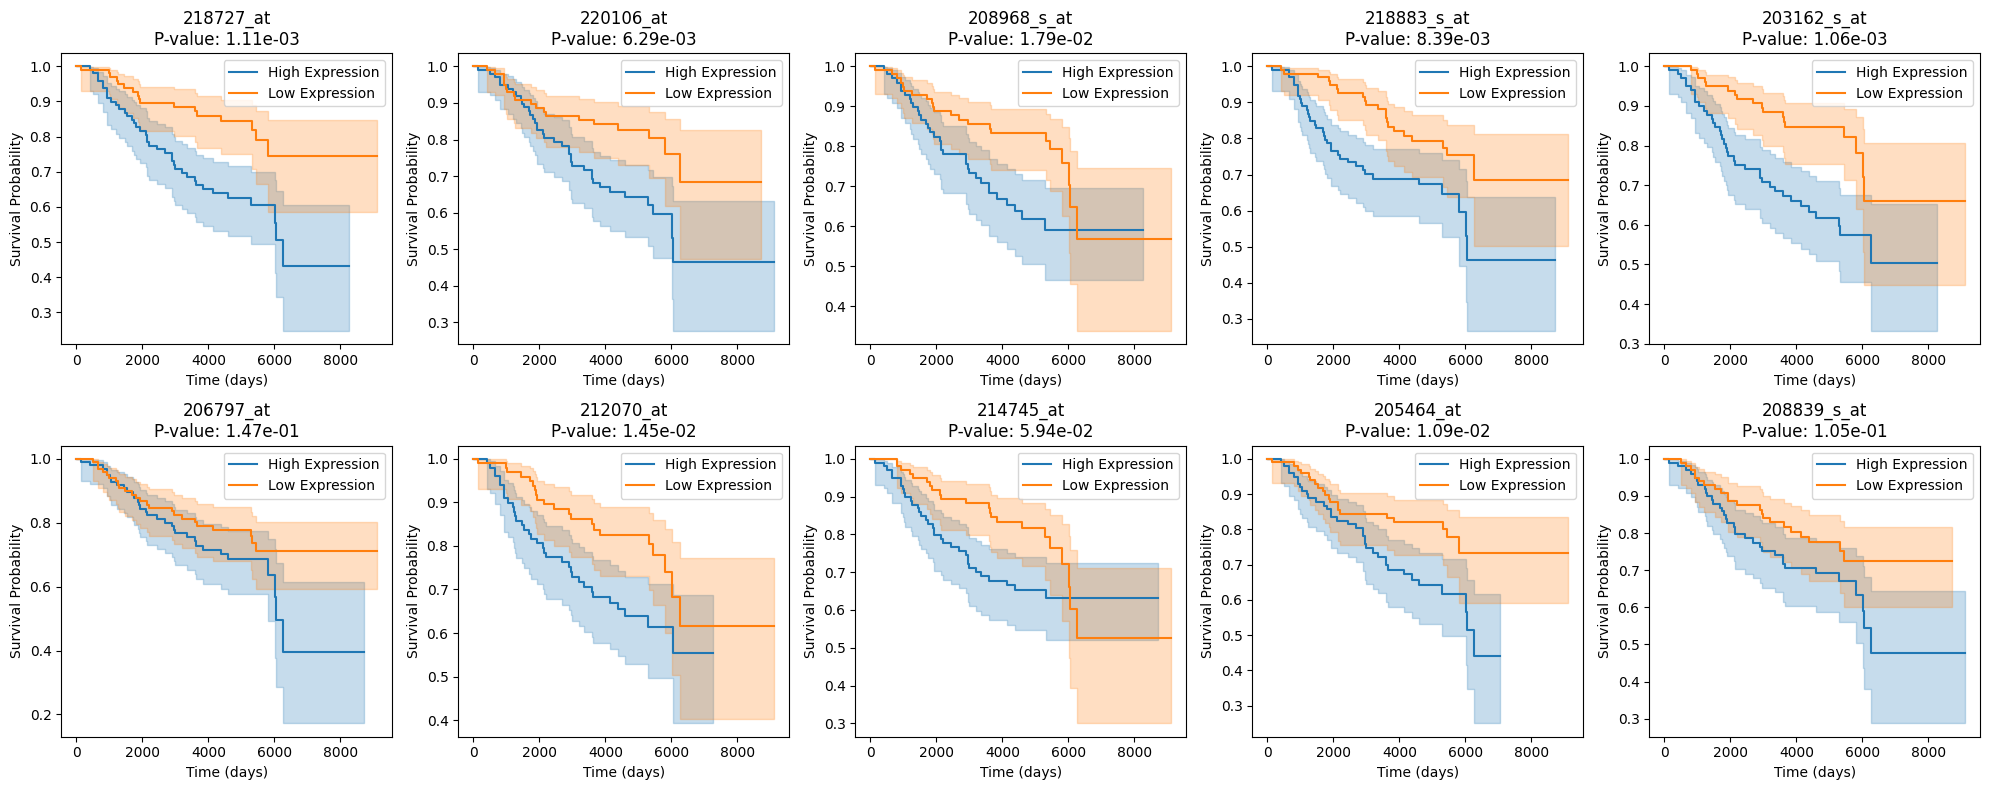

In [107]:
# Assuming `most_significant_gene_HR_1` is your DataFrame with the top significant genes
# Replace this with your actual DataFrame

# Define the number of top genes you want to plot
top_n_genes = 10

# Get the top N significant genes
top_genes = most_significant_gene_HR_1.head(top_n_genes)['gene']

# Number of rows and columns for the grid
nrows = 2
ncols = 5

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot Kaplan-Meier curves for each top gene
for i, gene in enumerate(top_genes):
    ax = axes[i]

    # Create high and low expression groups based on median expression
    median_expression = combined_data[gene].median()
    combined_data['high_expression'] = combined_data[gene] > median_expression

    # Fit the Kaplan-Meier estimator
    kmf_high = KaplanMeierFitter()
    kmf_low = KaplanMeierFitter()

    kmf_high.fit(durations=combined_data[combined_data['high_expression']]['time_os'],
                 event_observed=combined_data[combined_data['high_expression']]['status_os'],
                 label='High Expression')
    kmf_low.fit(durations=combined_data[~combined_data['high_expression']]['time_os'],
                event_observed=combined_data[~combined_data['high_expression']]['status_os'],
                label='Low Expression')

    # Plot the survival function
    kmf_high.plot_survival_function(ax=ax)
    kmf_low.plot_survival_function(ax=ax)

    # Perform log-rank test to get p-value
    results = logrank_test(
        combined_data[combined_data['high_expression']]['time_os'],
        combined_data[~combined_data['high_expression']]['time_os'],
        event_observed_A=combined_data[combined_data['high_expression']]['status_os'],
        event_observed_B=combined_data[~combined_data['high_expression']]['status_os']
    )
    p_value = results.p_value

    ax.set_title(f'{gene}\nP-value: {p_value:.2e}')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Survival Probability')
    ax.legend()

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [130]:
# functional gene enrichment
gp = GProfiler(return_dataframe=True)


In [131]:
# Ensure all gene symbols are strings and handle NaN values
sig_genes_pvalue2['Gene Symbol'] = sig_genes_pvalue2['Gene Symbol'].fillna('').astype(str)

# List of significant gene symbols, handling grouped symbols
top_genes_raw = sig_genes_pvalue2['Gene Symbol'].unique().tolist()

top_genes = []
for gene_group in top_genes_raw:
    if gene_group:  # Ensure the gene group is not an empty string
        for gene in gene_group.split(' /// '):
            top_genes.append(gene)


<ipython-input-131-9d97d772718c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_genes_pvalue2['Gene Symbol'] = sig_genes_pvalue2['Gene Symbol'].fillna('').astype(str)


<ipython-input-137-08e01351c2ae>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='p_value', y='name', data=top_results, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

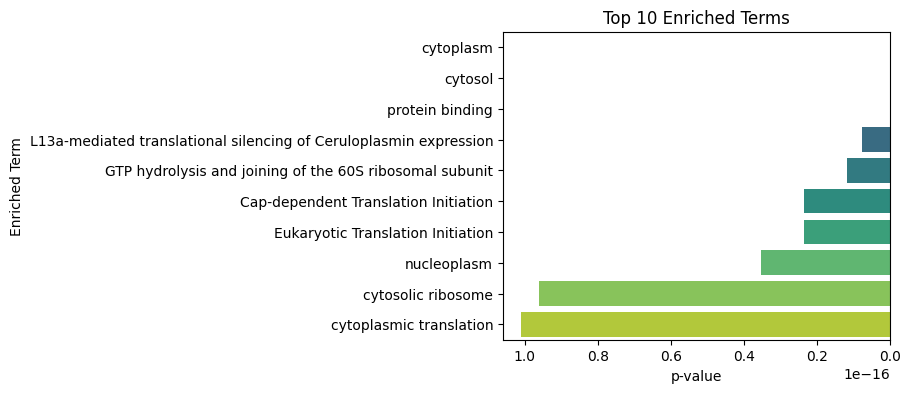

In [137]:
# Initialize GProfiler
gp = GProfiler(return_dataframe=True)

# Perform functional enrichment analysis
enrichment_results = gp.profile(organism='hsapiens', query=top_genes)
enrichment_results.to_csv('gene_enrich_results.csv', index=False)

<ipython-input-142-ff8b38e3e4dc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='p_value', y='name', data=top_results, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with

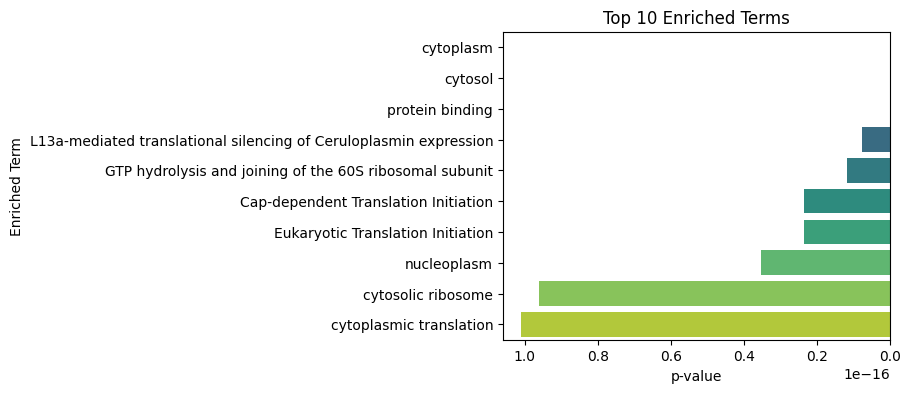

In [142]:
# Plotting the top 10 enrichment results based on p-value
top_results = enrichment_results.sort_values(by='p_value').head(10)

plt.figure(figsize=(5, 4))
sns.barplot(x='p_value', y='name', data=top_results, palette='viridis')
plt.title('Top 10 Enriched Terms')
plt.xlabel('p-value')
plt.ylabel('Enriched Term')
plt.gca().invert_xaxis()  # Invert x-axis to show the smallest p-values on the left
plt.show()

In [174]:
(top_results[['name', 'p_value', 'native', 'description']].iloc[::-1]).to_csv('gene_enrich_results_top10.csv', index=False)
